In [1]:
#importing required dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
#import our CSV

fbi_df1 = pd.read_csv("../../SQL_And_CSV/BinaryClassifier.csv")
fbi_df1.head()

,Unnamed: 0,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,offense_code,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,0,Angelina,County,Texas,West South Central,ANGELINA,South,8B,26B,Unknown,Unknown,0.0,U,I,25,95,20,375.0,False
1,1,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
2,2,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,65,0.0,False
3,3,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,13,320.0,False
4,4,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23F,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False


In [3]:
#drop extra index
fbi_df1 = fbi_df1.drop(labels ="Unnamed: 0",axis =1)
fbi_df1.head()

,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,offense_code,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,Angelina,County,Texas,West South Central,ANGELINA,South,8B,26B,Unknown,Unknown,0.0,U,I,25,95,20,375.0,False
1,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
2,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,65,0.0,False
3,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,13,320.0,False
4,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23F,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False


In [4]:
#removing value outliers
fbi_df2 = fbi_df1[fbi_df1["stolen_value"] < 100000]
fbi_df2.head()

,pub_agency_name,agency_type_name,state_name,division_name,county_name,region_name,population_group_code,offense_code,offender_race,offender_ethnicity,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,Angelina,County,Texas,West South Central,ANGELINA,South,8B,26B,Unknown,Unknown,0.0,U,I,25,95,20,375.0,False
1,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False
2,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,65,0.0,False
3,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23H,Unknown,Unknown,0.0,U,I,20,95,13,320.0,False
4,Jefferson,County,Alabama,East South Central,JEFFERSON,South,9A,23F,Unknown,Unknown,0.0,U,I,20,95,77,1.0,False


In [5]:
#Previous works simplifying dataset did not do as well as assumed. will now be trimming all columns that could be considered redundant 
to_drop = ["pub_agency_name","division_name", "county_name", "offender_ethnicity"]
fbi_df2 = fbi_df1.drop(labels = to_drop, axis = 1)
fbi_df2.head()

,agency_type_name,state_name,region_name,population_group_code,offense_code,offender_race,offender_age,offender_sex,victim_type_code,location_code,weapon_code,prop_desc_code,stolen_value,recovered_flag
0,County,Texas,South,8B,26B,Unknown,0.0,U,I,25,95,20,375.0,False
1,County,Alabama,South,9A,23H,Unknown,0.0,U,I,20,95,77,1.0,False
2,County,Alabama,South,9A,23H,Unknown,0.0,U,I,20,95,65,0.0,False
3,County,Alabama,South,9A,23H,Unknown,0.0,U,I,20,95,13,320.0,False
4,County,Alabama,South,9A,23F,Unknown,0.0,U,I,20,95,77,1.0,False


In [6]:
#ready to encode
enc = OneHotEncoder(sparse=False)
#will be bucketing where it makes sense as well.

In [7]:
#checking state name
states_counts = fbi_df2.state_name.value_counts()

#let's try cutting off at 1,000 and call it "Other US States/Territories"
replacements = list(states_counts[states_counts < 1000].index)

# Replace in DataFrame
for state in replacements:
    fbi_df2.state_name = fbi_df2.state_name.replace(state,"Other_US_States/Territories")


# Check to make sure data succesfully binned
fbi_df2.state_name.value_counts()
#there must be something going on in North Carolina

North Carolina                 26784
Ohio                           11927
Massachusetts                  10788
Texas                          10233
Georgia                         9850
Tennessee                       4891
South Carolina                  4596
Other_US_States/Territories     4570
Virginia                        4468
Michigan                        3772
Alabama                         3393
West Virginia                   3383
Maryland                        2419
Nevada                          2308
Pennsylvania                    2263
Missouri                        2145
Indiana                         1581
New Mexico                      1518
Oregon                          1437
California                      1375
Washington                      1372
Colorado                        1367
New Jersey                      1359
Illinois                        1350
Arkansas                        1292
Florida                         1283
Mississippi                     1232
N

In [8]:
#now let's check agency types
agency_counts = fbi_df2.agency_type_name.value_counts()

#let's try cutting off at 700 and call it "Tribal/Federal/Other
replacements = list(agency_counts[agency_counts < 700].index)

# Replace in DataFrame
for agency in replacements:
    fbi_df2.agency_type_name = fbi_df2.agency_type_name.replace(agency,"Tribal/Federal/Other")


# Check to make sure data succesfully binned
fbi_df2.agency_type_name.value_counts()

City                     87166
County                   33065
Tribal/Federal/Other      1127
State Police               877
University or College      721
Name: agency_type_name, dtype: int64

In [9]:
#make our target column binary for the encoder

fbi_df2.recovered_flag = fbi_df2.recovered_flag.replace({True:1,False:0})
#check to see if worked
fbi_df2.dtypes

agency_type_name          object
state_name                object
region_name               object
population_group_code     object
offense_code              object
offender_race             object
offender_age             float64
offender_sex              object
victim_type_code          object
location_code              int64
weapon_code               object
prop_desc_code             int64
stolen_value             float64
recovered_flag             int64
dtype: object

In [10]:
#with an additional set of bucketing done, it's time to go ahead and make everything binary
object_columns = fbi_df2.dtypes[fbi_df2.dtypes == "object"].index.tolist()
print(object_columns)

['agency_type_name', 'state_name', 'region_name', 'population_group_code', 'offense_code', 'offender_race', 'offender_sex', 'victim_type_code', 'weapon_code']


In [11]:
#Deploying the OHE produced earlier to make the conversions
# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(fbi_df2[object_columns]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(object_columns)
encode_df.head()

,agency_type_name_City,agency_type_name_County,agency_type_name_State Police,agency_type_name_Tribal/Federal/Other,agency_type_name_University or College,state_name_Alabama,state_name_Arkansas,state_name_California,state_name_Colorado,state_name_Florida,...,weapon_code_20,weapon_code_30,weapon_code_35,weapon_code_40,weapon_code_50,weapon_code_70,weapon_code_85,weapon_code_90,weapon_code_95,weapon_code_99
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
#take the encoded dataframe and add it back into the original, then drop the changed columns
fbi_df2 = fbi_df2.merge(encode_df, left_index=True, right_index = True)
fbi_df2= fbi_df2.drop(labels =object_columns,axis=1)
fbi_df2.head()

,offender_age,location_code,prop_desc_code,stolen_value,recovered_flag,agency_type_name_City,agency_type_name_County,agency_type_name_State Police,agency_type_name_Tribal/Federal/Other,agency_type_name_University or College,...,weapon_code_20,weapon_code_30,weapon_code_35,weapon_code_40,weapon_code_50,weapon_code_70,weapon_code_85,weapon_code_90,weapon_code_95,weapon_code_99
0,0.0,25,20,375.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,20,77,1.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,20,65,0.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,20,13,320.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,20,77,1.0,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
#with an additional set of bucketing done, it's time to go ahead and try some models
#SPLIT THE DATA FOR TESTING AND TRAINING
y = fbi_df2["recovered_flag"].values
X = fbi_df2.drop(labels ="recovered_flag",axis =1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=78)

In [14]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
#time to define the first new model with the shape of the previous most succesful model
#start with basic 3-3-1
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 3
hidden_nodes_layer2 = 3

nn10 = tf.keras.models.Sequential()

# First hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation="relu"))
       
# Second hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer2 ,activation="relu"))

# Output layer
nn10.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 354       
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 370
Trainable params: 370
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn10.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
#Train the Model
fit_model = nn10.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
2882/2882 [==============================] - 4s 1ms/step - loss: 0.3846 - accuracy: 0.8523
Epoch 2/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3391 - accuracy: 0.8593
Epoch 3/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3360 - accuracy: 0.8593
Epoch 4/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3347 - accuracy: 0.8593
Epoch 5/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3338 - accuracy: 0.8593
Epoch 6/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3333 - accuracy: 0.8593
Epoch 7/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3329 - accuracy: 0.8593
Epoch 8/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3328 - accuracy: 0.8593
Epoch 9/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3325 - accuracy: 0.8593
Epoch 10/100
2882/2882 [==============================] - 3s 1ms/step - l

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn10.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


961/961 - 1s - loss: 0.3306 - accuracy: 0.8600 - 1s/epoch - 1ms/step
Loss: 0.33061498403549194, Accuracy: 0.8600475192070007


<AxesSubplot:>

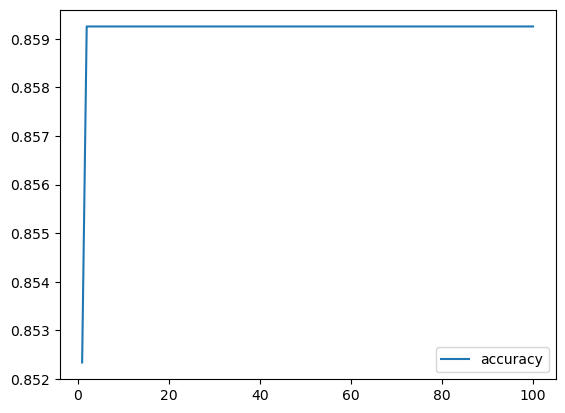

In [19]:
#graph accuracy over time.

loss_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))


# Graph of accuracy
loss_df.plot(y="accuracy")

<AxesSubplot:>

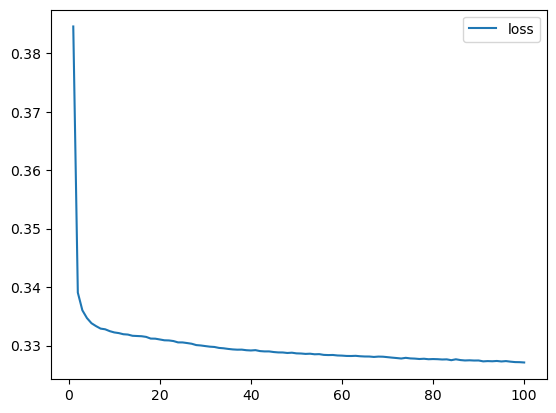

In [20]:
#graph loss
loss_df.plot(y="loss")

In [25]:
#big model time
#start with basic 3-3-1
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 6
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 3

nn11 = tf.keras.models.Sequential()

# First hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation="relu"))
       
# Second hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer2 ,activation="relu"))

# Output layer
nn11.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn11.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 708       
                                                                 
 dense_10 (Dense)            (None, 5)                 35        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 749
Trainable params: 749
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
nn11.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
#fit th ebig model, and up the train time to see
fit_model2 = nn11.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3286 - accuracy: 0.8635
Epoch 2/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3277 - accuracy: 0.8643
Epoch 3/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3268 - accuracy: 0.8643
Epoch 4/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3259 - accuracy: 0.8644
Epoch 5/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3256 - accuracy: 0.8646
Epoch 6/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3249 - accuracy: 0.8652
Epoch 7/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3243 - accuracy: 0.8654
Epoch 8/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3240 - accuracy: 0.8656
Epoch 9/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3236 - accuracy: 0.8654
Epoch 10/100
2882/2882 [==============================] - 3s 1ms/step - l

In [29]:
model_loss2, model_accuracy2 = nn11.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")


961/961 - 1s - loss: 0.3295 - accuracy: 0.8637 - 838ms/epoch - 872us/step
Loss: 0.3294558525085449, Accuracy: 0.863723635673523


<AxesSubplot:>

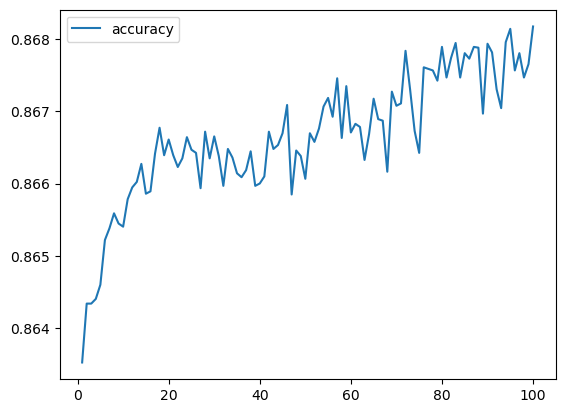

In [30]:
#graph accuracy over time.

loss_df = pd.DataFrame(fit_model2.history, index=range(1,len(fit_model2.history["loss"])+1))


# Graph of accuracy
loss_df.plot(y="accuracy")

<AxesSubplot:>

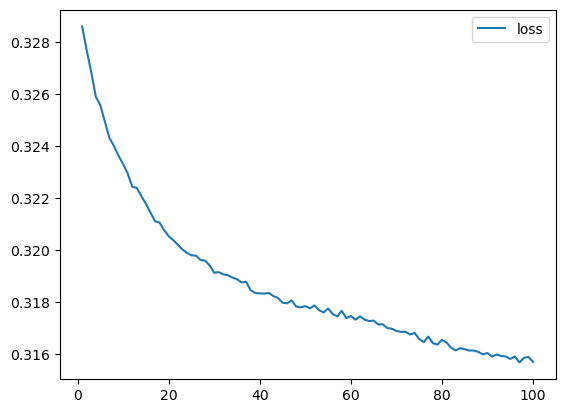

In [31]:
#graph loss
loss_df.plot(y="loss")

In [24]:
#small model
#big model time
#start with basic 3-3-1
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 6

nn12 = tf.keras.models.Sequential()

# First hidden layer
nn12.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation="relu"))
       
# Output layer
nn12.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn12.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 708       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 715
Trainable params: 715
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn12.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
fit_model2 = nn12.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3728 - accuracy: 0.8472
Epoch 2/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3381 - accuracy: 0.8617
Epoch 3/100
2882/2882 [==============================] - 3s 997us/step - loss: 0.3332 - accuracy: 0.8646
Epoch 4/100
2882/2882 [==============================] - 3s 995us/step - loss: 0.3301 - accuracy: 0.8661
Epoch 5/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3279 - accuracy: 0.8664
Epoch 6/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3259 - accuracy: 0.8673
Epoch 7/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3250 - accuracy: 0.8678
Epoch 8/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3236 - accuracy: 0.8682
Epoch 9/100
2882/2882 [==============================] - 3s 1ms/step - loss: 0.3230 - accuracy: 0.8684
Epoch 10/100
2882/2882 [==============================] - 3s 1ms/step

In [28]:
model_loss3, model_accuracy3 = nn12.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss3}, Accuracy: {model_accuracy3}")

961/961 - 1s - loss: 0.3176 - accuracy: 0.8725 - 756ms/epoch - 786us/step
Loss: 0.31760990619659424, Accuracy: 0.8725072145462036
